In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add the utils directory to Python path
sys.path.append(str(Path.cwd().parents[1]))
from utils.data_loading import load_datasets

# Load the datasets using the utility function
train_df, test_df, val_df, odc = load_datasets()

# Load clinical data and ID mapping
clinical = pd.read_excel(Path.cwd().parents[1] / "data" / "219 patients.xlsx")
id_map = pd.read_csv(Path.cwd().parents[1] / "data" / "patient_id_mapping.csv")
id_map.columns = ['Anon.Patient_ID', 'study_id']

# Combine datasets for analysis
df = pd.concat([train_df, test_df])

# Merge with ID mapping and clinical data
df_with_id = df.merge(id_map, on="Anon.Patient_ID", how="left")
df_full = df_with_id.merge(clinical, left_on="study_id", right_on="study_id", how="left")

# Create results directory if it doesn't exist
output_folder = Path.cwd().parents[1] / "results" / "eda"
output_folder.mkdir(parents=True, exist_ok=True)

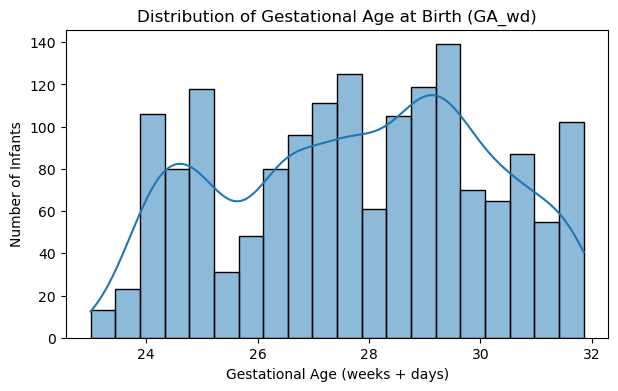

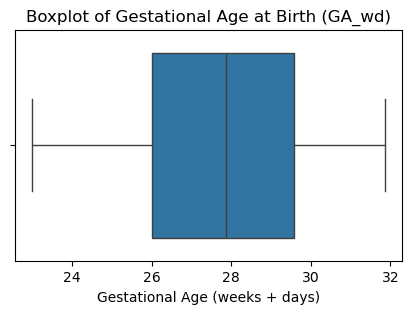

In [2]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(df_full['GA_wd'], bins=20, kde=True)
plt.title("Distribution of Gestational Age at Birth (GA_wd)")
plt.xlabel("Gestational Age (weeks + days)")
plt.ylabel("Number of Infants")
plt.show()

# Boxplot
plt.figure(figsize=(5,3))
sns.boxplot(x=df_full['GA_wd'])
plt.title("Boxplot of Gestational Age at Birth (GA_wd)")
plt.xlabel("Gestational Age (weeks + days)")
plt.show()


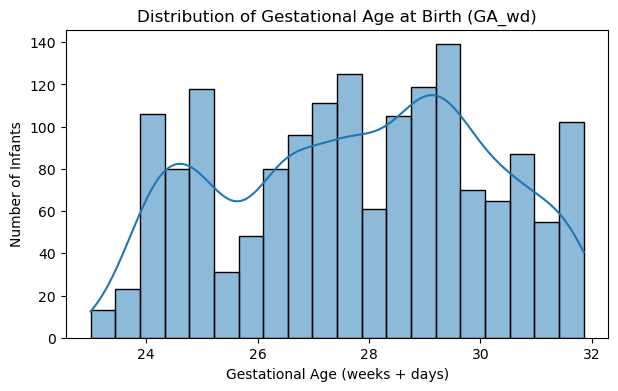

In [3]:
plt.figure(figsize=(7,4))
sns.histplot(df_full['GA_wd'], bins=20, kde=True)
plt.title("Distribution of Gestational Age at Birth (GA_wd)")
plt.xlabel("Gestational Age (weeks + days)")
plt.ylabel("Number of Infants")
plt.savefig(f"{output_folder}/hist_GA_wd.png", dpi=300, bbox_inches="tight")
plt.show()


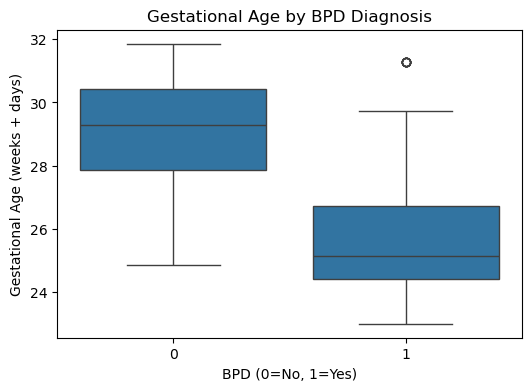

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x='BPD_yn', y='GA_wd', data=df_full)
plt.title("Gestational Age by BPD Diagnosis")
plt.xlabel("BPD (0=No, 1=Yes)")
plt.ylabel("Gestational Age (weeks + days)")
plt.savefig(f"{output_folder}/boxplot_GA_wd_by_BPD.png", dpi=300, bbox_inches="tight")
plt.show()


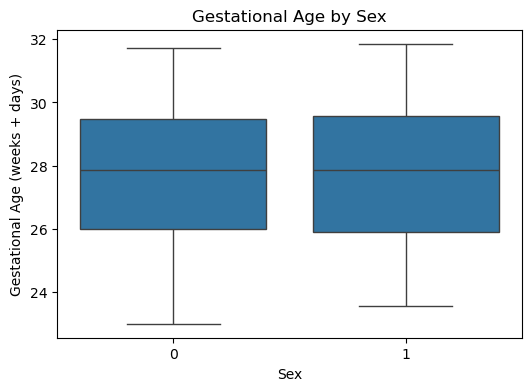

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='GA_wd', data=df_full)
plt.title("Gestational Age by Sex")
plt.xlabel("Sex")
plt.ylabel("Gestational Age (weeks + days)")
# plt.savefig(f"{output_folder}/boxplot_GA_wd_by_Sex.png", dpi=300, bbox_inches="tight")
plt.show()


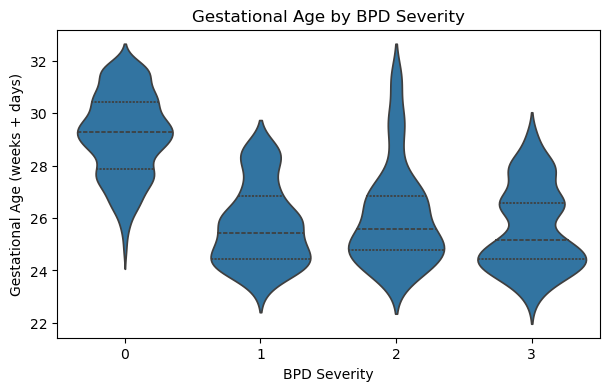

In [6]:
plt.figure(figsize=(7,4))
sns.violinplot(x='BPD_severity', y='GA_wd', data=df_full, inner='quartile')
plt.title("Gestational Age by BPD Severity")
plt.xlabel("BPD Severity")
plt.ylabel("Gestational Age (weeks + days)")
# plt.savefig(f"{output_folder}/violin_GA_wd_by_BPD_severity.png", dpi=300, bbox_inches="tight")
plt.show()


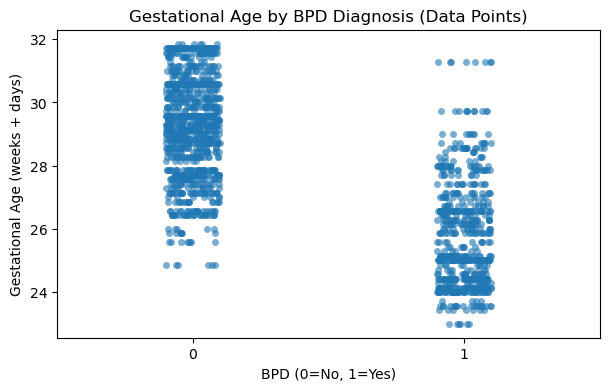

In [7]:
plt.figure(figsize=(7,4))
sns.stripplot(x='BPD_yn', y='GA_wd', data=df_full, jitter=True, alpha=0.6)
plt.title("Gestational Age by BPD Diagnosis (Data Points)")
plt.xlabel("BPD (0=No, 1=Yes)")
plt.ylabel("Gestational Age (weeks + days)")
# plt.savefig(f"{output_folder}/stripplot_GA_wd_by_BPD.png", dpi=300, bbox_inches="tight")
plt.show()


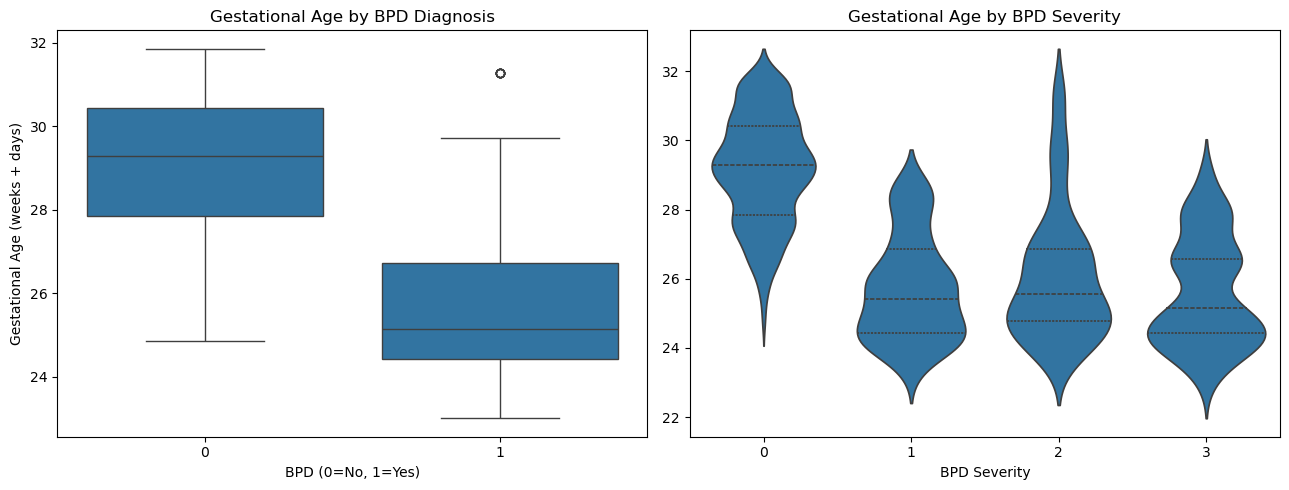

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(13, 5))  # Adjust width for more space

# Boxplot: BPD Diagnosis (left)
sns.boxplot(x='BPD_yn', y='GA_wd', data=df_full, ax=axes[0])
axes[0].set_title("Gestational Age by BPD Diagnosis")
axes[0].set_xlabel("BPD (0=No, 1=Yes)")
axes[0].set_ylabel("Gestational Age (weeks + days)")

# Violinplot: BPD Severity (right)
sns.violinplot(x='BPD_severity', y='GA_wd', data=df_full, inner='quartile', ax=axes[1])
axes[1].set_title("Gestational Age by BPD Severity")
axes[1].set_xlabel("BPD Severity")
axes[1].set_ylabel("")  # Optional: remove y-label for clarity

plt.tight_layout()
# Uncomment to save:
plt.savefig(f"{output_folder}/GA_wd_by_BPD_combined.png", dpi=300, bbox_inches="tight")
plt.show()


In [9]:
import numpy as np

# Remove missing values for calculation
ga = df_full['GA_wd'].dropna()

print("Summary statistics for Gestational Age (GA_wd):")
print(f"Count:     {ga.count()}")
print(f"Mean:      {ga.mean():.2f}")
print(f"Std dev:   {ga.std():.2f}")
print(f"Median:    {ga.median():.2f}")
print(f"Mode:      {ga.mode().values[0] if not ga.mode().empty else 'n/a'}")
print(f"Min:       {ga.min():.2f}")
print(f"Max:       {ga.max():.2f}")
print(f"Range:     {ga.min():.2f} - {ga.max():.2f}")
print(f"25th pct:  {ga.quantile(0.25):.2f}")
print(f"75th pct:  {ga.quantile(0.75):.2f}")
print(f"IQR:       {ga.quantile(0.75) - ga.quantile(0.25):.2f}")
print(f"Skewness:  {ga.skew():.2f}")
print(f"Kurtosis:  {ga.kurtosis():.2f}")


Summary statistics for Gestational Age (GA_wd):
Count:     1634
Mean:      27.80
Std dev:   2.31
Median:    27.86
Mode:      25.0
Min:       23.00
Max:       31.86
Range:     23.00 - 31.86
25th pct:  26.00
75th pct:  29.57
IQR:       3.57
Skewness:  -0.13
Kurtosis:  -1.04


In [10]:
from scipy.stats import mannwhitneyu

ga_bpd0 = df_full[df_full['BPD_yn'] == 0]['GA_wd']
ga_bpd1 = df_full[df_full['BPD_yn'] == 1]['GA_wd']

stat, p = mannwhitneyu(ga_bpd0, ga_bpd1, alternative='two-sided')
print(f"Mann-Whitney U statistic: {stat:.2f}, p-value: {p:.4f}")


Mann-Whitney U statistic: 589669.00, p-value: 0.0000


In [11]:
from scipy.stats import kruskal

groups = [group['GA_wd'].values for name, group in df_full.groupby('BPD_severity')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H statistic: {stat:.2f}, p-value: {p:.4f}")


Kruskal-Wallis H statistic: 833.61, p-value: 0.0000
